# =============================================================================
# Economia com Pierre 📊
# Dados e Google trends
# Tutorial: Baixando dados e
# Data: 08/08/2025
# =============================================================================


/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


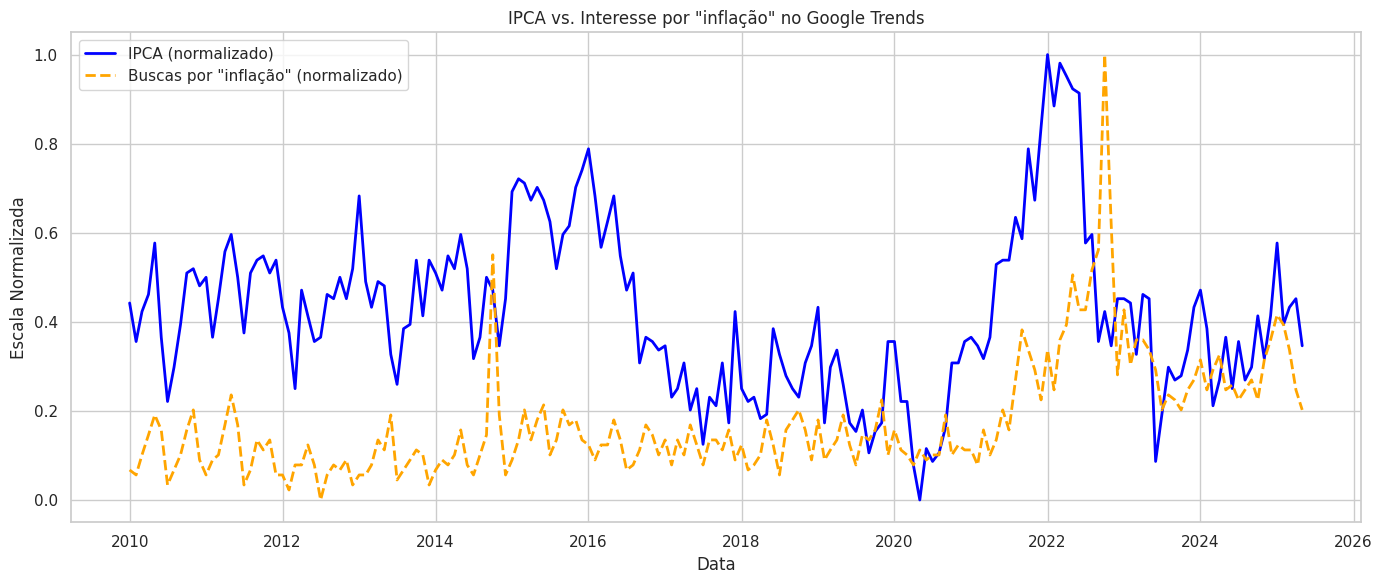

In [3]:
# Instalar pacotes (no Colab / Jupyter use !)
!pip install pandas matplotlib seaborn pytrends requests

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq
import requests
import io

sns.set_theme(style="whitegrid")

# 1️⃣ Puxar série do Bacen (IPCA acumulado 12 meses - código 4466)
url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.4466/dados?formato=csv"
r = requests.get(url)
df_ipca = pd.read_csv(io.StringIO(r.text), sep=';', decimal=',')
df_ipca['data'] = pd.to_datetime(df_ipca['data'], dayfirst=True)
df_ipca.rename(columns={'valor': 'ipca'}, inplace=True)

# 2️⃣ Puxar Google Trends (termo 'inflação')
pytrends = TrendReq(hl='pt-BR', tz=360)
pytrends.build_payload(['inflação'], geo='BR', timeframe='2010-01-01 2025-07-01')
df_trends = pytrends.interest_over_time().reset_index()[['date','inflação']]
df_trends.rename(columns={'date':'data'}, inplace=True)

# 3️⃣ Juntar dataframes
df = pd.merge(df_ipca, df_trends, on='data', how='inner')

# Normalizar para comparar em mesmo gráfico
df['ipca_norm'] = (df['ipca'] - df['ipca'].min()) / (df['ipca'].max() - df['ipca'].min())
df['inflacao_trends_norm'] = (df['inflação'] - df['inflação'].min()) / (df['inflação'].max() - df['inflação'].min())

# 4️⃣ Plotar
plt.figure(figsize=(14,6))
plt.plot(df['data'], df['ipca_norm'], label='IPCA (normalizado)', color='blue', linewidth=2)
plt.plot(df['data'], df['inflacao_trends_norm'], label='Buscas por "inflação" (normalizado)', color='orange', linewidth=2, linestyle='--')

plt.title('IPCA vs. Interesse por "inflação" no Google Trends')
plt.xlabel('Data')
plt.ylabel('Escala Normalizada')
plt.legend()
plt.tight_layout()
plt.show()
